# Analyse Exploratoire

### Import des modules

In [1024]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib

### Analyse Exploratoire

In [1025]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [1026]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [1027]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [1028]:
print('Nombre de lignes', len(building_consumption))

Nombre de lignes 3376


In [1029]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [1030]:
building_consumption.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

In [1031]:
# Les différents types de batiments
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

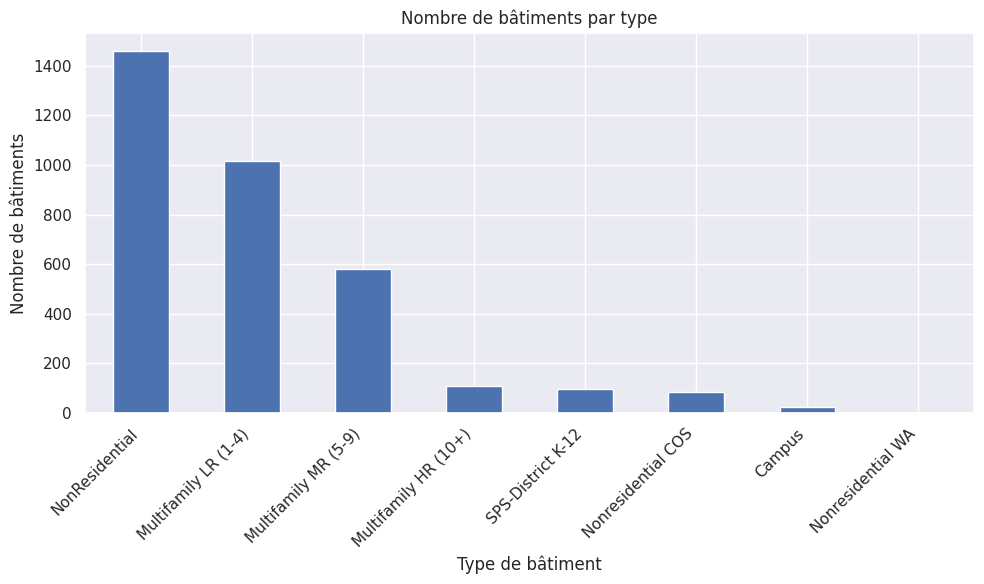

In [1032]:
#Nombre de batiment par type building

building_counts = building_consumption['BuildingType'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 6))
building_counts.plot(kind='bar')

# Ajouter titres et étiquettes
plt.title("Nombre de bâtiments par type")
plt.xlabel("Type de bâtiment")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [1033]:
# Suppresion des types résidentiels

building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily LR (1-4)'].index, inplace=True)
building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily MR (5-9)'].index, inplace=True)
building_consumption.drop(building_consumption[building_consumption['BuildingType']  == 'Multifamily HR (10+)'].index, inplace=True)


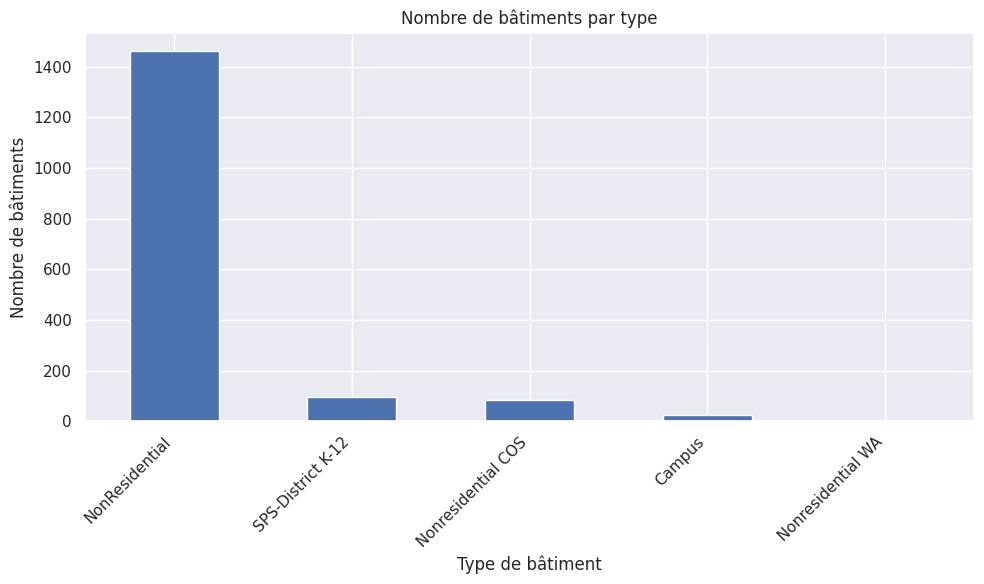

In [1034]:
building_counts = building_consumption['BuildingType'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 6))
building_counts.plot(kind='bar')

# Ajouter titres et étiquettes
plt.title("Nombre de bâtiments par type")
plt.xlabel("Type de bâtiment")
plt.ylabel("Nombre de bâtiments")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [1035]:
#Nombre de colonne 
print("Nombre de colonnes Avant :", len(building_consumption.columns))


Nombre de colonnes Avant : 46


In [1036]:
# Analyse valeur constante

for col in building_consumption.columns:
    vc = building_consumption[col].value_counts(dropna=False)
    missing_ratio = building_consumption[col].isnull().mean()
    if len(vc) == 1:
        print(f"{col} est constante : {vc.index[0]}")
        building_consumption.drop(columns=col, inplace=True)
    elif missing_ratio > 0.5:
        print(f"{col} → {missing_ratio:.1%} de valeurs manquantes")
       


DataYear est constante : 2016
City est constante : Seattle
State est constante : WA
ThirdLargestPropertyUseType → 78.8% de valeurs manquantes
ThirdLargestPropertyUseTypeGFA → 78.8% de valeurs manquantes
YearsENERGYSTARCertified → 94.1% de valeurs manquantes
Comments est constante : nan
Outlier → 99.0% de valeurs manquantes


In [1037]:
building_consumption['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'K-12 School', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant',
       'Worship Facility', 'Supermarket/Grocery Store', 'Strip Mall',
       'Vocational School'], dtype=object)

In [1038]:
# Filtrage sur le compliant status

building_consumption = building_consumption[building_consumption['ComplianceStatus'] == 'Compliant']


In [1039]:
# Suppresion des colonnes non utiles

colonnes = [
    'OSEBuildingID',
    'CouncilDistrictCode',
    'PropertyName',
    'Address',
    'TaxParcelIdentificationNumber',
    'YearsENERGYSTARCertified',
    'Latitude',
    'Longitude',
    'ZipCode',
    'ComplianceStatus',
    'DefaultData'
]

building_consumption.drop(columns=colonnes, inplace=True)


In [1040]:
# Garder une seule version par variable redondante

colonnes = [
    "SiteEUI(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SiteEnergyUse(kBtu)",
    "Electricity(kWh)",
    "NaturalGas(therms)",
    'GHGEmissionsIntensity',
    'ListOfAllPropertyUseTypes'
    
]

building_consumption.drop(columns=colonnes, inplace=True)


In [1041]:
# Traitement colonne outlier

building_consumption['Outlier'].unique()

building_consumption = building_consumption[
    ~building_consumption['Outlier'].isin(['High outlier', 'Low outlier'])
]

building_consumption.drop(columns=['Outlier'], inplace=True)

In [1042]:
print("Nombre de colonnes Après :", len(building_consumption.columns))
print('Nombre de lignes', len(building_consumption))

# Deux target SiteEnergyUseWN(kBtu) et TotalGHGEmissions
building_consumption.describe()

Nombre de colonnes Après : 23
Nombre de lignes 1548


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1548.000000,1548.000000,1548.000000,1.548000e+03,1548.000000,1.548000e+03,1.544000e+03,842.000000,348.000000,997.000000,1547.000000,1548.000000,1.547000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000
mean,1961.644057,1.178941,4.276486,1.213321e+05,13842.337209,1.074898e+05,9.994564e+04,36342.497977,14998.889077,63.635908,77.525857,185.360271,8.441981e+06,5.511831e+05,6.140840e+06,2.038297e+06,193.608908
std,32.886918,3.039221,6.780694,3.062944e+05,43721.822291,2.926272e+05,2.855014e+05,66631.152358,37037.015147,28.825309,76.235063,187.995700,2.277676e+07,5.718502e+06,2.151071e+07,9.710667e+06,779.105278
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,1930.000000,1.000000,1.000000,2.884325e+04,0.000000,2.793675e+04,2.501575e+04,5564.250000,2624.250000,44.000000,37.000000,84.225002,1.322090e+06,0.000000e+00,7.308642e+05,0.000000e+00,20.655000
50%,1965.500000,1.000000,2.000000,4.815900e+04,0.000000,4.608400e+04,4.204300e+04,12062.500000,5965.500000,71.000000,56.299999,141.800003,2.824097e+06,0.000000e+00,1.746086e+06,4.881350e+05,49.845000
75%,1989.000000,1.000000,4.000000,1.076615e+05,0.000000,9.556825e+04,9.203675e+04,31820.250000,12965.500000,88.000000,87.900002,215.749996,7.470130e+06,0.000000e+00,5.264935e+06,1.530812e+06,147.227500
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,834.400024,2620.000000,4.716139e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000


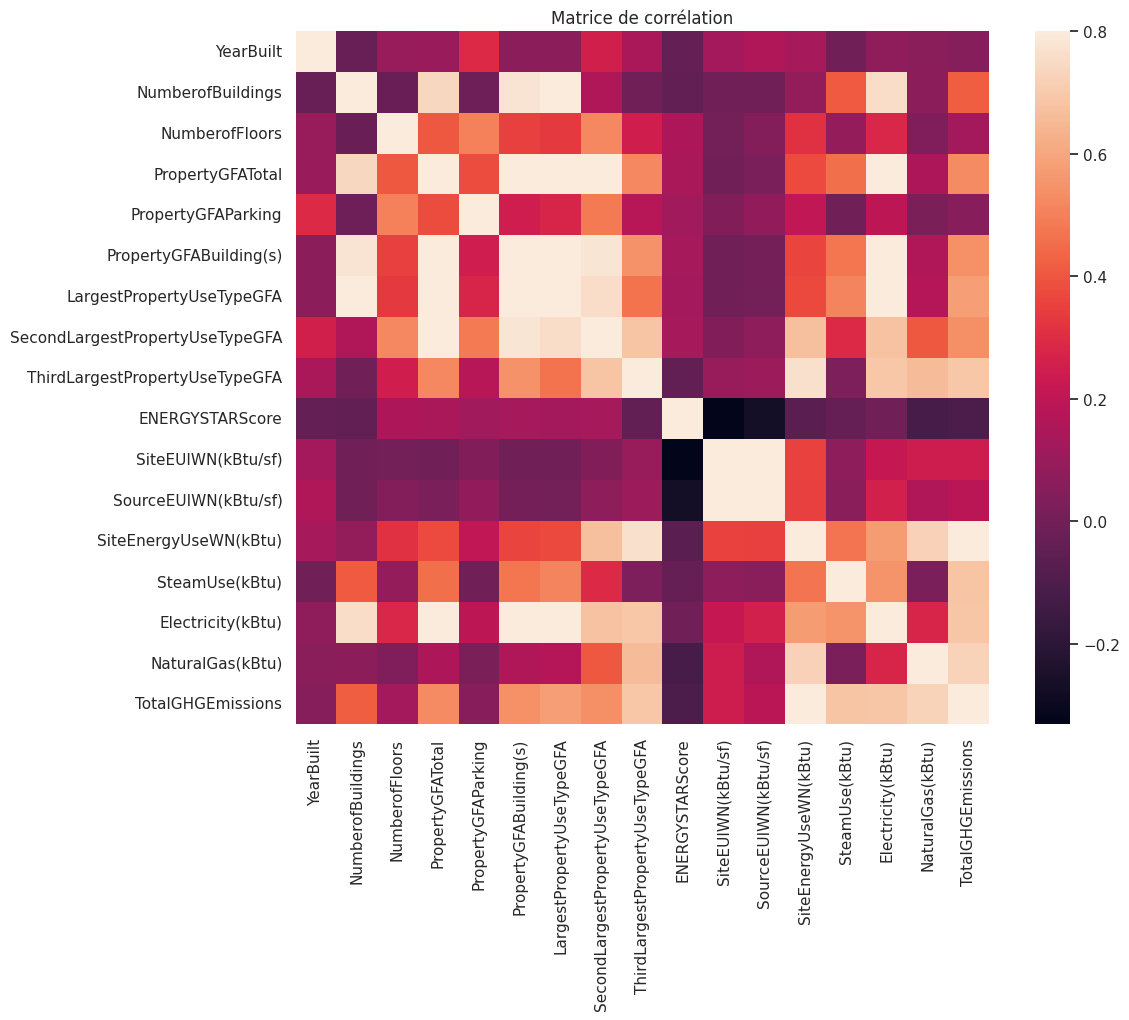

In [1043]:
corrmat = building_consumption.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Matrice de corrélation")
plt.show()


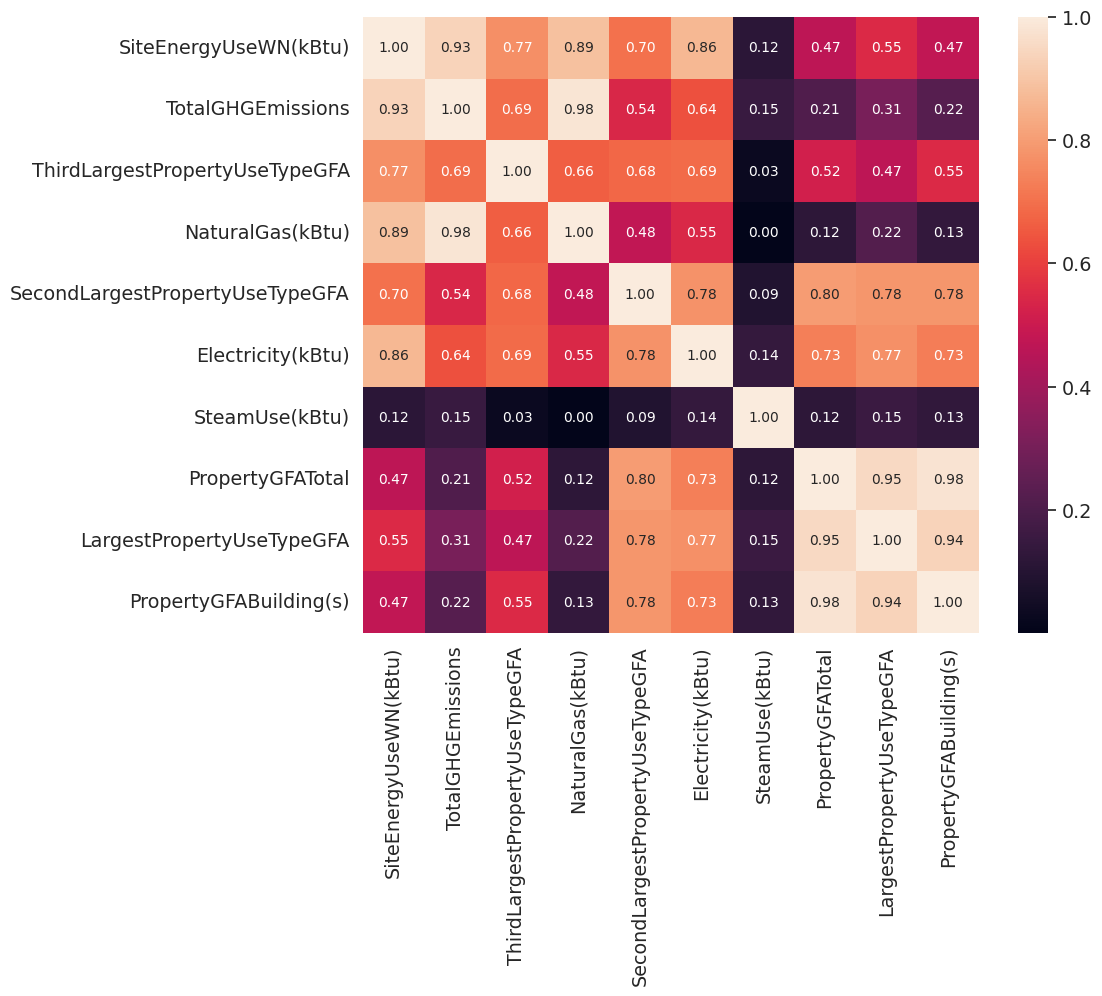

In [1044]:
# Corrélation Matrix pour SiteEnergyUseWN(kBtu)

corrmat = building_consumption.corr(numeric_only=True)

k = 10
cols = corrmat.nlargest(k, 'SiteEnergyUseWN(kBtu)')['SiteEnergyUseWN(kBtu)'].index

filtered_data = building_consumption[cols].dropna()

cm = np.corrcoef(filtered_data.values.T)

sns.set(font_scale=1.25)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<Axes: >

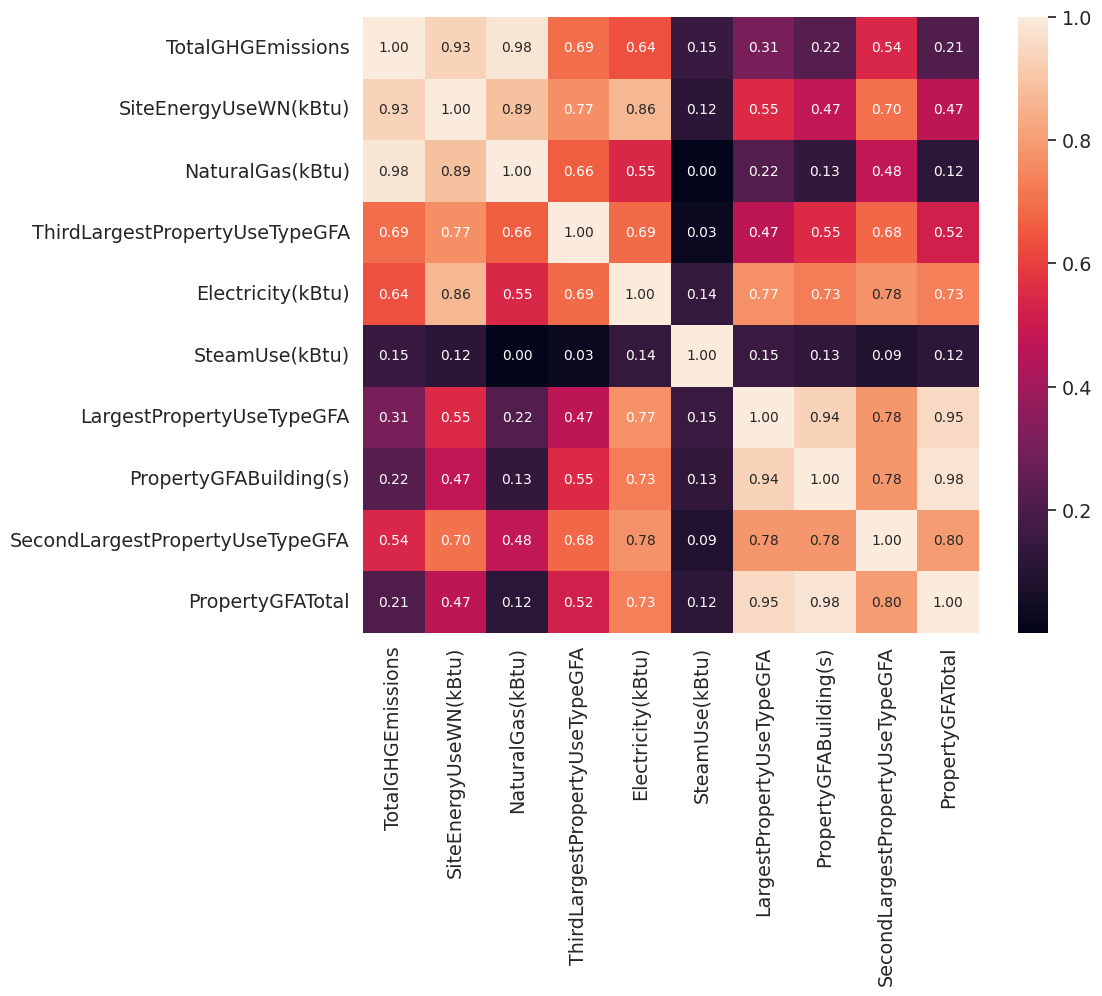

In [1045]:
# Corrélation Matrix pour TotalGHGEmissions

corrmat = building_consumption.corr(numeric_only=True)

k = 10
cols = corrmat.nlargest(k, 'TotalGHGEmissions')['TotalGHGEmissions'].index

filtered_data = building_consumption[cols].dropna()

cm = np.corrcoef(filtered_data.values.T)

sns.set(font_scale=1.25)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

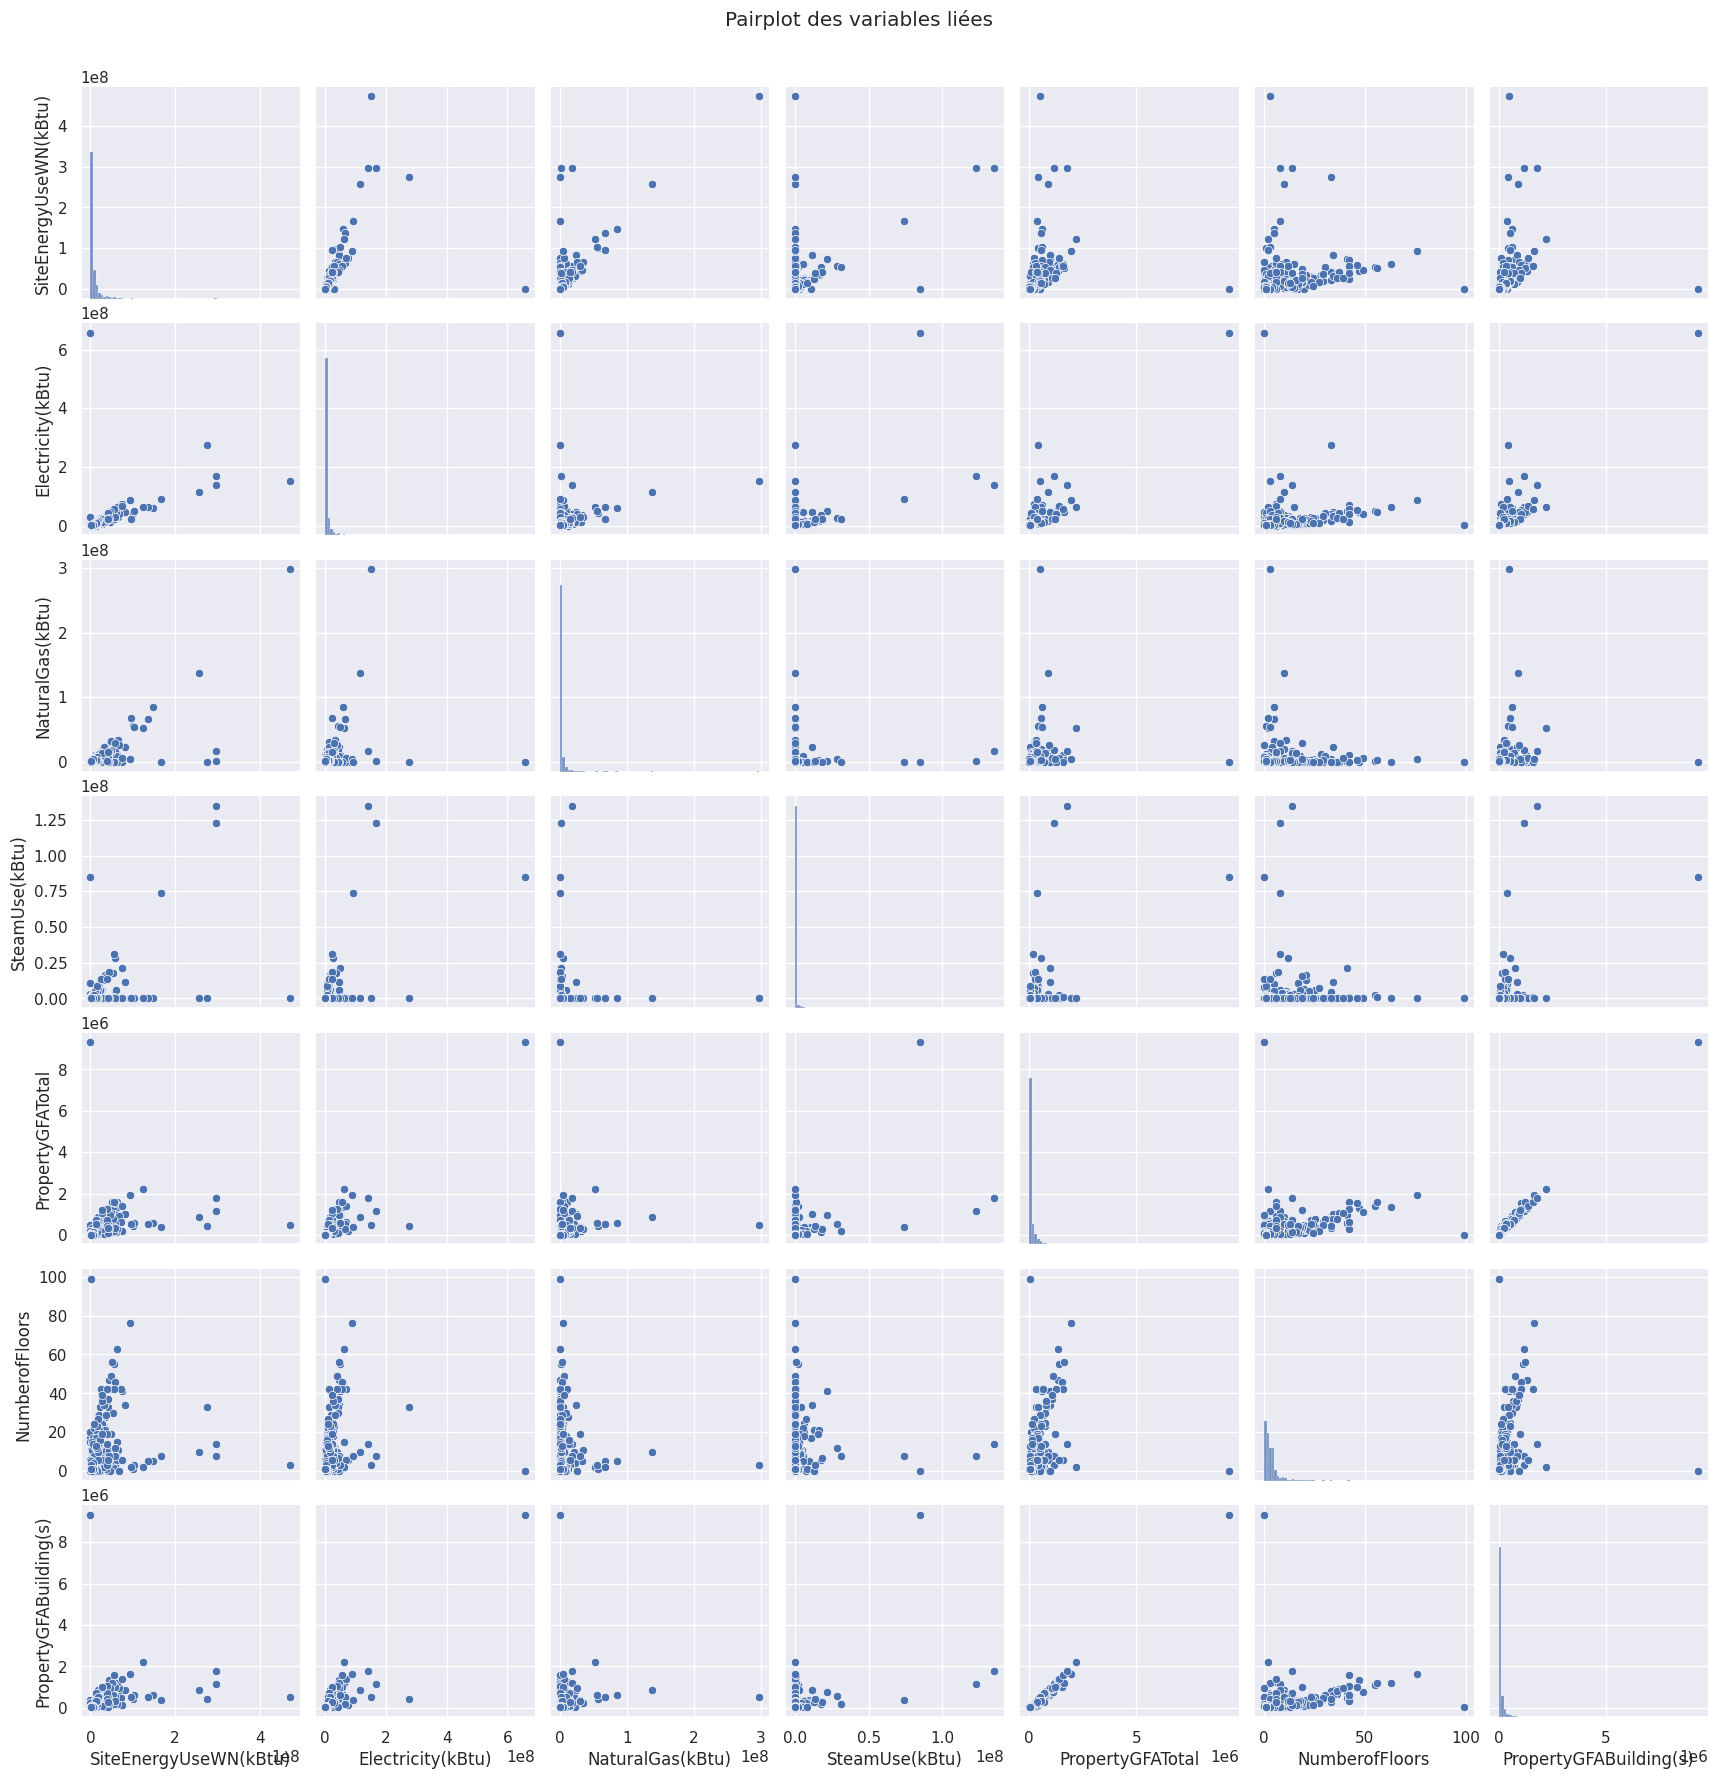

In [1046]:
sns.set()

cols = [
    "SiteEnergyUseWN(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "SteamUse(kBtu)",
    "PropertyGFATotal",
    "NumberofFloors",
    "PropertyGFABuilding(s)"
]

sns.pairplot(building_consumption[cols], height=2.5)
plt.suptitle("Pairplot des variables liées", y=1.02)
plt.show()

In [1048]:
# Data leakage

building_consumption['electricity'] = building_consumption['Electricity(kBtu)'].fillna(0) > 0
building_consumption['natural_gas'] = building_consumption['NaturalGas(kBtu)'].fillna(0) > 0
building_consumption['steam'] = building_consumption['SteamUse(kBtu)'].fillna(0) > 0


building_consumption["has_parking"] = (building_consumption["PropertyGFAParking"] > 0).astype(int)

building_consumption.drop(columns=['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'], inplace=True)

In [1049]:
# Transformation de la date en tranche de décennie

building_consumption['YearBuilt']
building_consumption['YearBuilt'] = (building_consumption['YearBuilt'] // 10) * 10

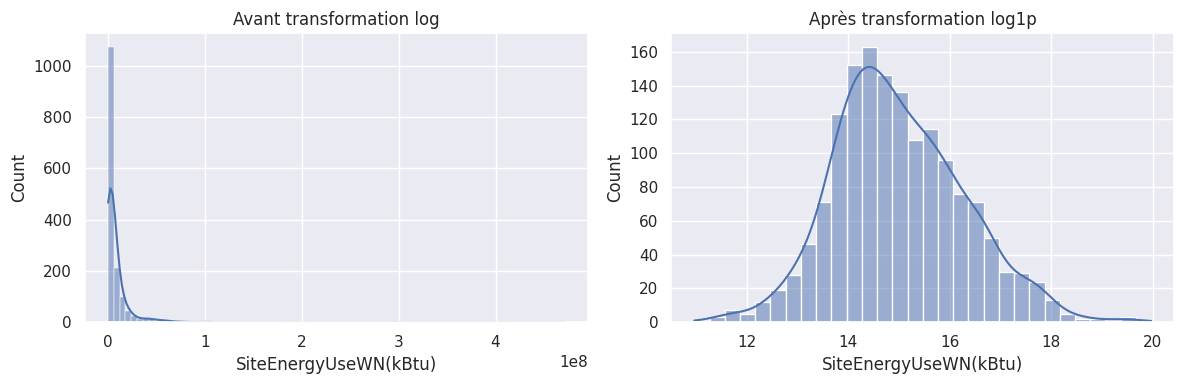

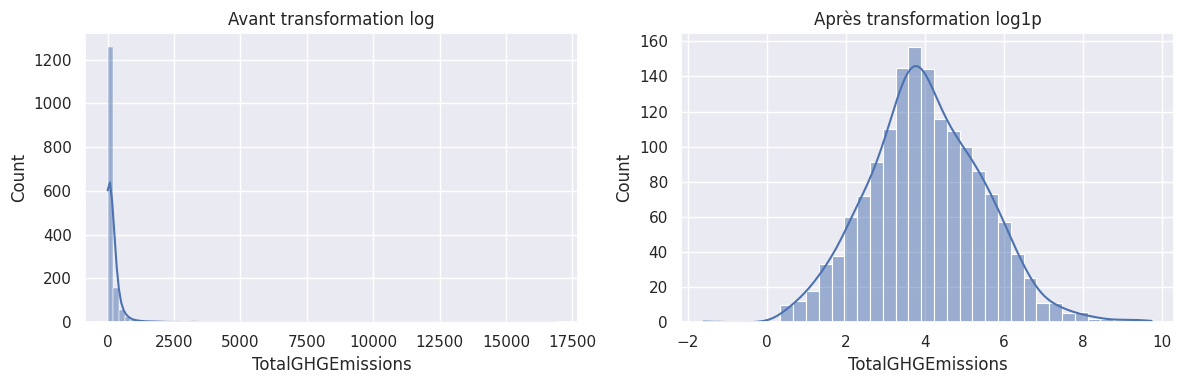

In [1050]:
# Analyse des targets / Netoyage 0 et nan

building_consumption = building_consumption[building_consumption['TotalGHGEmissions'] != 0]
building_consumption = building_consumption[building_consumption['SiteEnergyUseWN(kBtu)'] != 0]

building_consumption = building_consumption.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'])

# Analyse forme de la target SiteEnergyUseWN(kBtu)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['SiteEnergyUseWN(kBtu)'], kde=True)
plt.title("Avant transformation log")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['SiteEnergyUseWN(kBtu)']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

# Analyse forme de la target TotalGHGEmissions

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['TotalGHGEmissions'], kde=True)
plt.title("Avant transformation log")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['TotalGHGEmissions']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['SiteEnergyUseWN(kBtu)'] = np.log1p(building_consumption['SiteEnergyUseWN(kBtu)'])
building_consumption['TotalGHGEmissions'] = np.log1p(building_consumption['TotalGHGEmissions'])

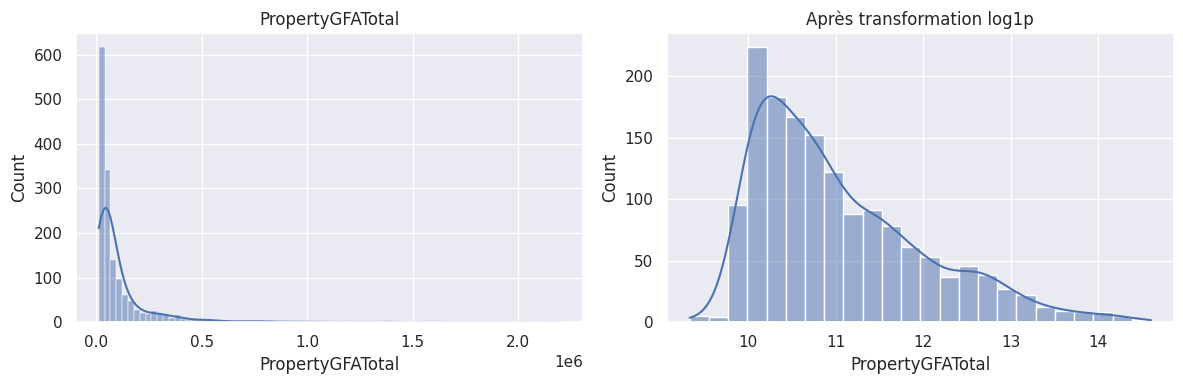

In [1051]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['PropertyGFATotal'], kde=True)
plt.title("PropertyGFATotal")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['PropertyGFATotal']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['PropertyGFATotal'] = np.log1p(building_consumption['PropertyGFATotal'])



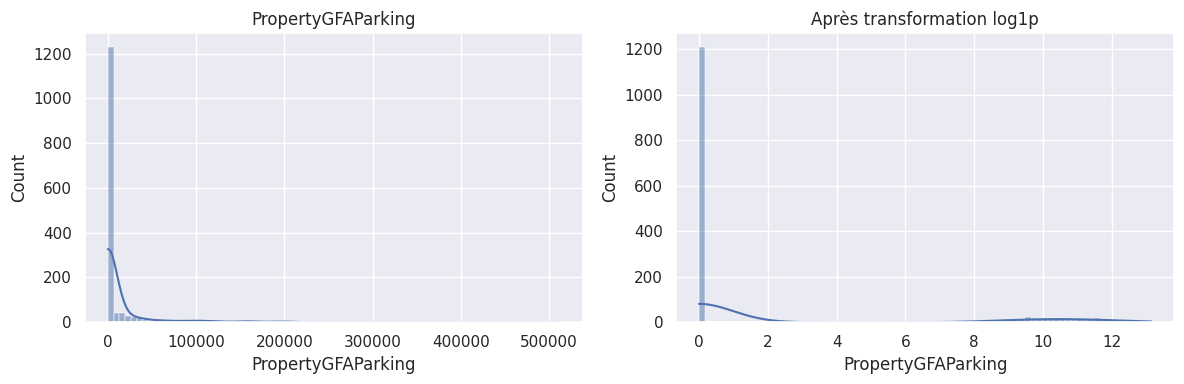

In [1052]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['PropertyGFAParking'], kde=True)
plt.title("PropertyGFAParking")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['PropertyGFAParking']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['PropertyGFAParking'] = np.log1p(building_consumption['PropertyGFAParking'])

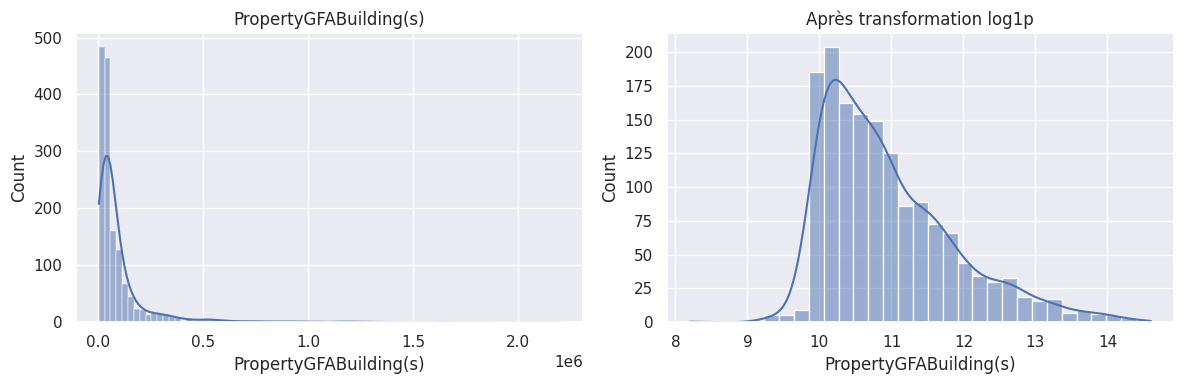

In [1053]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['PropertyGFABuilding(s)'], kde=True)
plt.title("PropertyGFABuilding(s)")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['PropertyGFABuilding(s)']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['PropertyGFABuilding(s)'] = np.log1p(building_consumption['PropertyGFABuilding(s)'])

/tmp/ipykernel_11844/3395807051.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/marin/.cache/pypoetry/virtualenvs/b-timentpr-dictif-aerCWrIB-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


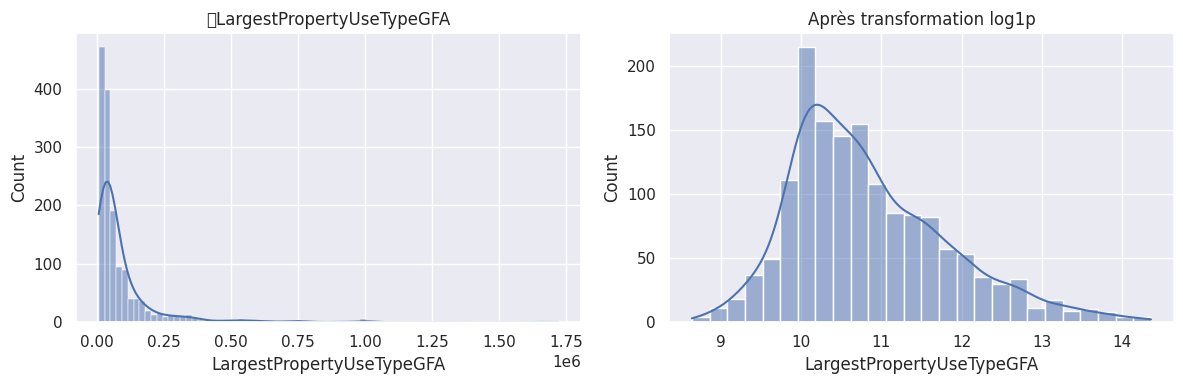

In [1054]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['LargestPropertyUseTypeGFA'], kde=True)
plt.title("	LargestPropertyUseTypeGFA")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['LargestPropertyUseTypeGFA']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['LargestPropertyUseTypeGFA'] = np.log1p(building_consumption['LargestPropertyUseTypeGFA'])

/tmp/ipykernel_11844/1877599280.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/marin/.cache/pypoetry/virtualenvs/b-timentpr-dictif-aerCWrIB-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


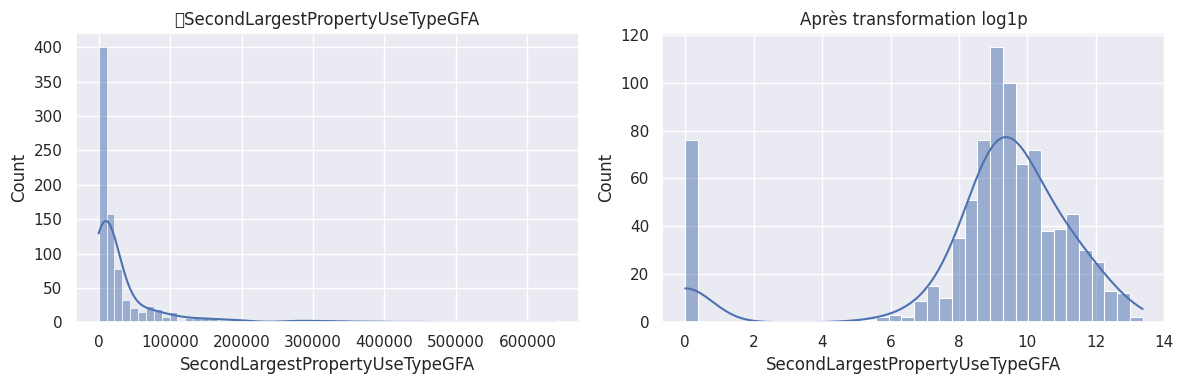

In [1055]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['SecondLargestPropertyUseTypeGFA'], kde=True)
plt.title("	SecondLargestPropertyUseTypeGFA")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['SecondLargestPropertyUseTypeGFA']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['SecondLargestPropertyUseTypeGFA'] = np.log1p(building_consumption['SecondLargestPropertyUseTypeGFA'])

/tmp/ipykernel_11844/4280728816.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/marin/.cache/pypoetry/virtualenvs/b-timentpr-dictif-aerCWrIB-py3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


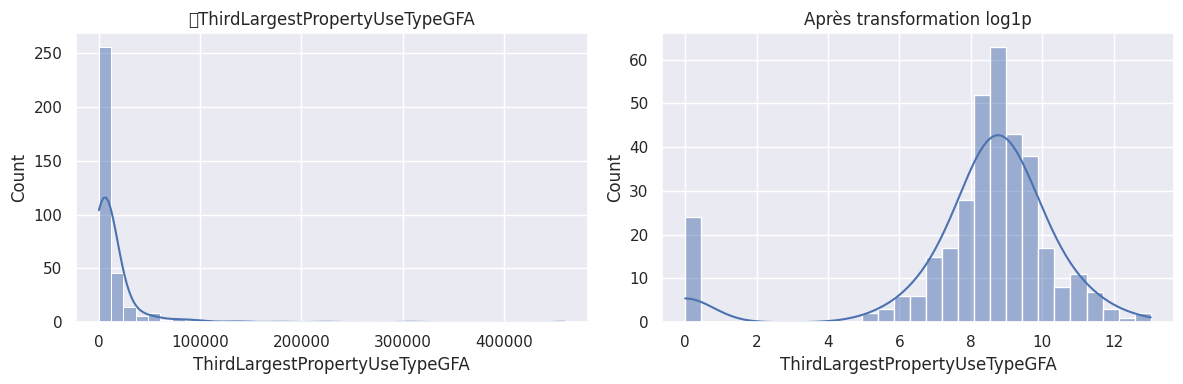

In [1056]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(building_consumption['ThirdLargestPropertyUseTypeGFA'], kde=True)
plt.title("	ThirdLargestPropertyUseTypeGFA")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(building_consumption['ThirdLargestPropertyUseTypeGFA']), kde=True)
plt.title("Après transformation log1p")

plt.tight_layout()
plt.show()

building_consumption['ThirdLargestPropertyUseTypeGFA'] = np.log1p(building_consumption['ThirdLargestPropertyUseTypeGFA'])

In [1057]:
# Traitement des NAn

na_cols = building_consumption.columns[building_consumption.isna().any()]
print("Colonnes avec NaN :")
print(building_consumption[na_cols].isna().sum())

# Pour les batiments qui n'ont pas de 3 type remplacer nan par 0

building_consumption['LargestPropertyUseTypeGFA'] = building_consumption['LargestPropertyUseTypeGFA'].fillna(0)
building_consumption['ThirdLargestPropertyUseTypeGFA'] = building_consumption['ThirdLargestPropertyUseTypeGFA'].fillna(0)
building_consumption['SecondLargestPropertyUseTypeGFA'] = building_consumption['SecondLargestPropertyUseTypeGFA'].fillna(0)

building_consumption['LargestPropertyUseType'] = building_consumption['LargestPropertyUseType'].fillna('None')
building_consumption['ThirdLargestPropertyUseType'] = building_consumption['ThirdLargestPropertyUseType'].fillna('None')
building_consumption['SecondLargestPropertyUseType'] = building_consumption['SecondLargestPropertyUseType'].fillna('None')

building_consumption['ENERGYSTARScore'] = building_consumption['ENERGYSTARScore'].fillna(building_consumption['ENERGYSTARScore'].mean())

Colonnes avec NaN :
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        700
SecondLargestPropertyUseTypeGFA     700
ThirdLargestPropertyUseType        1191
ThirdLargestPropertyUseTypeGFA     1191
ENERGYSTARScore                     548
dtype: int64


In [1058]:
# Voir le nombre de colonne non numérique

non_numeric_cols = building_consumption.select_dtypes(exclude=["number"]).columns

for col in non_numeric_cols:
    unique_count = building_consumption[col].nunique()
    print(f"{col} : {unique_count} valeur(s) unique(s)")


BuildingType : 5 valeur(s) unique(s)
PrimaryPropertyType : 21 valeur(s) unique(s)
Neighborhood : 19 valeur(s) unique(s)
LargestPropertyUseType : 56 valeur(s) unique(s)
SecondLargestPropertyUseType : 48 valeur(s) unique(s)
ThirdLargestPropertyUseType : 40 valeur(s) unique(s)
electricity : 2 valeur(s) unique(s)
natural_gas : 2 valeur(s) unique(s)
steam : 2 valeur(s) unique(s)


In [1059]:
import joblib

joblib.dump(building_consumption, "building.joblib")
pd.set_option('display.max_columns', None)

building_consumption.head()

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,electricity,natural_gas,steam,has_parking
0,NonResidential,Hotel,DOWNTOWN,1920,1.0,12,11.390023,0.000000,11.390023,Hotel,11.390023,None,0.000000,None,0.000000,60.0,15.824652,5.525373,True,True,True,0
1,NonResidential,Hotel,DOWNTOWN,1990,1.0,11,11.547974,9.620129,11.390792,Hotel,11.337154,Parking,9.620129,Restaurant,8.438799,61.0,15.974742,5.693261,True,True,False,1
2,NonResidential,Hotel,DOWNTOWN,1960,1.0,41,13.770629,12.189532,13.540275,Hotel,13.536450,None,0.000000,None,0.000000,43.0,18.118725,7.645053,True,True,True,1
3,NonResidential,Hotel,DOWNTOWN,1920,1.0,10,11.023878,0.000000,11.023878,Hotel,11.023878,None,0.000000,None,0.000000,56.0,15.753792,5.660979,True,True,True,0
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,12.075856,11.034906,11.640272,Hotel,11.723559,Parking,11.127410,Swimming Pool,0.000000,75.0,16.500395,6.226556,True,True,False,1
